In [9]:
# --- 必要ライブラリ ---
# Pillow: 画像読み込み
# NumPy : 配列演算
# scikit-image: フィルタと大津の2値化
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_otsu
import cv2
# ========== ユーザー設定 ==========
image_path_noise = "spinodal_gray_noise200.png"  # 入力画像
image_path_mask = "spinodal_mask.png"  # mask画像）
sigma = 1.5                # ガウスぼかしの標準偏差（大きいほど強くぼける）
# =================================


array([[  0, 255, 255, ..., 255,   0, 255],
       [  0, 255,  88, ..., 255, 255, 167],
       [255,   0,   0, ..., 255, 148, 255],
       ...,
       [237,  70,  26, ..., 166,  67,   0],
       [ 52, 238,   0, ..., 255, 191, 255],
       [255, 237, 255, ..., 152, 255, 255]], dtype=uint8)
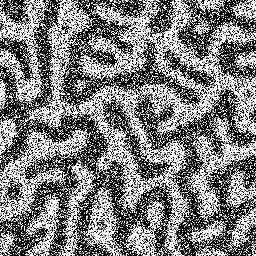

In [10]:
img_u8 = np.array(Image.open(image_path_noise).convert("L"), dtype=np.uint8)
img_u8

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,  13, ..., 255, 255, 255],
       [  0,   4,  13, ..., 255, 255, 255],
       ...,
       [237, 237, 237, ..., 186, 196, 239],
       [238, 238, 237, ..., 186, 196, 222],
       [237, 237, 237, ..., 196, 222, 255]], dtype=uint8)
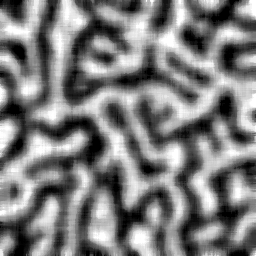

In [13]:
filtered=cv2.medianBlur(img_u8,15)
filtered

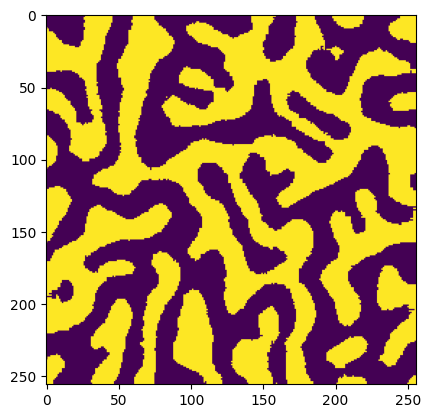

In [16]:
th = threshold_otsu(filtered)
bw = (filtered> th).astype(np.uint8)  # 処理“前”の2値（0 or 1）
plt.imshow(bw)
plt.show()

In [35]:
#画像の保存
bw_result=bw*255
img = Image.fromarray(bw_result.astype(np.uint8))
img.save("result.png")

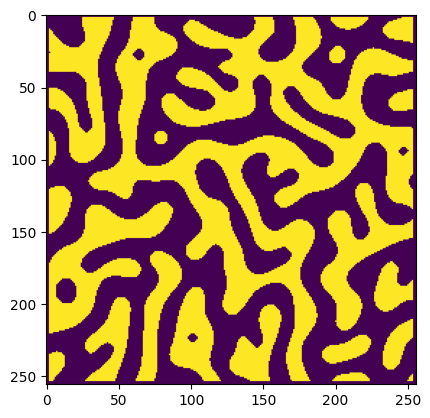

In [26]:
#mask画像の読み込み
img_mask = np.array(Image.open(image_path_mask).convert("L"), dtype=np.uint8)/255
plt.imshow(img_mask)
plt.show()

In [29]:
#評価
MAE_after = np.mean(np.abs(img_mask.astype(float) - bw.astype(float)))
print(MAE_after)

0.0943756103515625


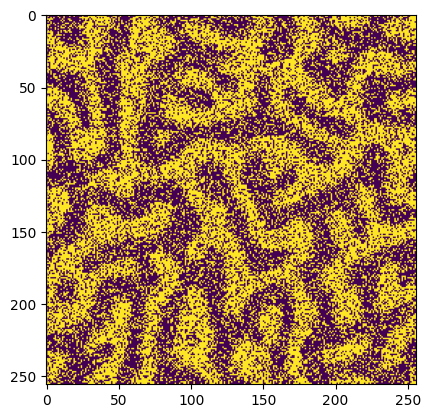

In [32]:
#フィルタを使わずに２値化
th_noisy = threshold_otsu(img_u8)
bw_noisy = (img_u8> th_noisy).astype(np.uint8)  # 処理“前”の2値（0 or 1）
plt.imshow(bw_noisy)
plt.show()

In [ ]:
#フィルタを使わずに２値化した場合のMAE
MAE_before = np.mean(np.abs(img_mask.astype(float) - img_u8.astype(float)))
print(MAE_before)